In [3]:
# always execute this cell first
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime
from colorama import Fore, Back, Style

pd.set_option('display.max_colwidth',None) # display max columns of CSV
pd.set_option('display.max_rows',None) # display maximum  rows of CSV
twitter_df = pd.read_csv('data/twitter_data.csv')
reddit_df = pd.read_csv('data/reddit_data.csv')

#### Functions


In [16]:

def add_readable_datetime(dataFrame):
    dataFrame['datetime']=pd.to_datetime(dataFrame['posted_time'].astype(np.int64),unit='s')
    return dataFrame


def sentiment_anayled_piechart_of_coin(start_dateObj,end_dateObj,coinName):
    reddit_dataFrame=add_readable_datetime(reddit_df)
    twitter_dataFrame=add_readable_datetime(twitter_df)
    current_date=start_dateObj
    while current_date<=end_dateObj:
        filtered_reddit_df=reddit_dataFrame[(reddit_dataFrame['coin_name']==coinName) & (reddit_dataFrame['datetime'].dt.date==current_date)]
        filtered_twitter_df=twitter_dataFrame[(twitter_dataFrame['coin_name']==coinName) & (twitter_dataFrame['datetime'].dt.date==current_date)]
        # get reddit data
        if not filtered_reddit_df.empty: 
            ones = filtered_reddit_df['label'].value_counts().get(1, 0)
            zeros = filtered_reddit_df['label'].value_counts().get(0, 0)
            neg_ones = filtered_reddit_df['label'].value_counts().get(-1, 0)

            ones = 0 if pd.isna(ones) else ones
            zeros = 0 if pd.isna(zeros) else zeros
            neg_ones = 0 if pd.isna(neg_ones) else neg_ones
            
            slices=[ones,zeros,neg_ones]
            labelNames=['positives','neutral','negatives']

            plt.pie(slices,labels=labelNames,wedgeprops={'edgecolor':'black'},autopct='%1.0f%%')
            plt.title(f"{current_date} chart")
            print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+"\nReddit Data \n",end=Style.RESET_ALL+Back.RESET+Fore.RESET)   
            plt.show()
            print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+f"postives={ones}, neutral={zeros}, negatives={neg_ones}",end=Style.RESET_ALL+Back.RESET+Fore.RESET)
            display(filtered_reddit_df.sort_values(['post_score','num_comments'],ascending=[False,False]))
        else:
            print('\nthe dataframe is empty in this day:',current_date)
        # get twitter data
        if not filtered_twitter_df.empty:
            ones = filtered_twitter_df['label'].value_counts().get(1, 0)
            zeros = filtered_twitter_df['label'].value_counts().get(0, 0)
            neg_ones = filtered_twitter_df['label'].value_counts().get(-1, 0)

            ones = 0 if pd.isna(ones) else ones
            zeros = 0 if pd.isna(zeros) else zeros
            neg_ones = 0 if pd.isna(neg_ones) else neg_ones
            
            slices=[ones,zeros,neg_ones]
            labelNames=['positives','neutral','negatives']

            plt.pie(slices,labels=labelNames,wedgeprops={'edgecolor':'black'},autopct='%1.0f%%')
            plt.title(f"{current_date} chart")
            print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+"\ntwitter Data \n",end=Style.RESET_ALL+Back.RESET+Fore.RESET)   
            plt.show()
            print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+f"postives={ones}, neutral={zeros}, negatives={neg_ones}",end=Style.RESET_ALL+Back.RESET+Fore.RESET)  
            display(filtered_twitter_df.sort_values(['likes','replies'],ascending=[False,False]))
        else:
            print('\nthe dataframe is empty in this day:',current_date)

        current_date += datetime.timedelta(days=1) # increment day by day


def print_all_sorted_posts(dataFrame,sortingColumnName):
    dataFrame=dataFrame.sort_values(['datetime',sortingColumnName],ascending=[False,False])
    dataFrame=add_readable_datetime(dataFrame)
    return dataFrame


def print_info_of_coin(dataFrame,coinName):
    dataFrame=dataFrame.sort_values(by='posted_time',ascending=False)
    dataFrame=add_readable_datetime(dataFrame)
    filt = (dataFrame['coin_name'] == coinName)
    return dataFrame[filt]


def print_posts_of_given_date(dataFrame,givenDate,coinName):
    dataFrame=add_readable_datetime(dataFrame)
    filtered_df=dataFrame[(dataFrame['coin_name']==coinName) & (dataFrame['datetime'].dt.date==givenDate)]
    return filtered_df


def print_sorted_reddit_posts_acording_to_column(start_dateObj,end_dateObj,columnNumber):
    columnName=""
    if columnNumber == 1:
        columnName="upvote_ratio"
    elif columnNumber == 2:
        columnName="post_score"
    elif columnNumber == 3:
        columnName="num_comments"

    dataFrame=add_readable_datetime(pd.read_csv('data/reddit_data.csv'))
    current_date=end_dateObj
    while current_date>=start_dateObj:
        filtered_df=dataFrame[ (dataFrame['datetime'].dt.date==current_date)]
        filtered_df=filtered_df.sort_values([columnName,'datetime'],ascending=[False,False])  
        if not filtered_df.empty:
            display(filtered_df.head(40))
        else:
            print('\nthe dataframe is empty in this day:',current_date)
        current_date -= datetime.timedelta(days=1) # increment day by day


def print_sorted_twitter_posts_acording_to_column(start_dateObj,end_dateObj,columnNumber):
    columnName=""
    if columnNumber == 1:
        columnName="likes"
    elif columnNumber == 2:
        columnName="replies"
    elif columnNumber == 3:
        columnName="views"
    elif columnNumber == 4:
        columnName="retweets"    

    dataFrame=add_readable_datetime(pd.read_csv('data/twitter_data.csv'))
    current_date=end_dateObj
    while current_date>=start_dateObj:
        filtered_df=dataFrame[ (dataFrame['datetime'].dt.date==current_date)]
        filtered_df=filtered_df.sort_values([columnName,'datetime'],ascending=[False,False])  
        if not filtered_df.empty:
            display(filtered_df.head(40))
        else:
            print('\nthe dataframe is empty in this day:',current_date)
        current_date -= datetime.timedelta(days=1) # increment day by day



# def print_sorted_reddit_posts_acording_to_column_2(start_dateObj,end_dateObj,columnNumber):
#     #find column
#     columnName=1
#     if columnNumber == 1:
#         columnName="upvote_ratio"
#     elif columnNumber == 2:
#         columnName="post_score"
#     elif columnNumber == 3:
#         columnName="num_comments"
 
#     dataFrame=add_readable_datetime(reddit_df)
#     mask=(dataFrame['datetime']>=start_dateObj) & (dataFrame['datetime']<=end_dateObj)
#     dataFrame=dataFrame.loc[mask]
    
#     filtered_df=dataFrame.sort_values([columnName,'datetime'],ascending=[False,False])  
#     return filtered_df.head(100)



#### Coin Names
```
BTC
ETH *+
ETC
Avalanche(AVAX)
Solana(SOL) *+
Monero(XMR) *+
Optimism(OP)
PAX Gold(PAXG) 
Ripple(XRP) *+
Arbitrum(ARB)
Binance(BNB) *-
Cardano(ADA)
Cosmos(ATOM)
Litecoin(LTC) *+
Chainlink(LINK) 
Aave(AAVE)
Polygon(MATIC)
Gas(GAS)
```

#### Get Sorted all  data

- #####  Reddit

In [ ]:
# upvote_ratio=1,post_score=2,num_comments=3
print_sorted_reddit_posts_acording_to_column(start_dateObj=datetime.date(2023,11,1),end_dateObj=datetime.date(2023,11,1),columnNumber=3)

In [ ]:
print_info_of_coin(dataFrame=reddit_df,coinName='ETH')

- #####  Twitter


In [ ]:
# likes=1,replies=2,views=3,retweets=4
print_sorted_twitter_posts_acording_to_column(start_dateObj=datetime.date(2023,11,1),end_dateObj=datetime.date(2023,11,1),columnNumber=2)

In [ ]:
print_info_of_coin(dataFrame=twitter_df,coinName='ETH')

#### Sentiment Analysis chart 




BTC 
 Reddit Data 


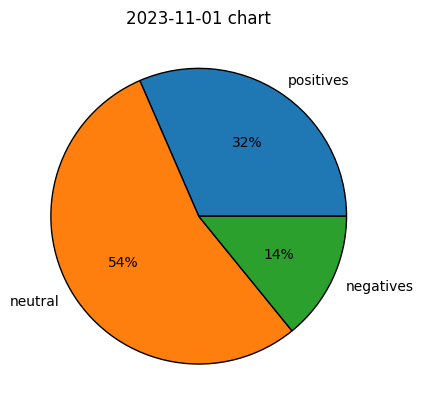

postives=58, neutral=100, negatives=26

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2267,MicroStrategy acquired an additional 155 BTC for $5.3 million,1.698870e+09,0.97,521,96,BTC,0,2023-11-01 20:26:24
2292,"93.0% of all BTC has been mined! Only 1,470,000 BTC remain to be mined!",1.698832e+09,0.96,477,85,BTC,0,2023-11-01 09:42:53
2257,Fidelity has said bitcoin could go to 1 billion by 2038,1.698881e+09,0.83,266,200,BTC,0,2023-11-01 23:20:41
2293,From the iamverysmart community on Reddit: Bitcoiner with PhD in physics outlines his plan for retiring in 2-3 years.,1.698830e+09,0.93,138,40,BTC,0,2023-11-01 09:16:15
2261,Today we reached an important milestone: 93% of all the Bitcoin that will ever exist have already been issued. The scramble for the remaining 7% will be legendary.,1.698877e+09,0.96,101,15,BTC,1,2023-11-01 22:17:32
1851,"As Bitcoin hovers around $34,500 I can’t help but smile and think …",1.698807e+09,0.90,74,45,BTC,1,2023-11-01 02:41:51
2189,Kitboga torturing scammers who want his BTC,1.698847e+09,0.82,61,21,BTC,-1,2023-11-01 14:03:24
2277,"From the first day I heard of Bitcoin, I wished it could incentivize file sharing with BitTorrent",1.698860e+09,0.96,59,3,BTC,1,2023-11-01 17:35:06
2192,Nayib Bukele took a critical COVID relief fund to finance the implementation of Bitcoin as legal tender.,1.698844e+09,0.65,58,150,BTC,1,2023-11-01 13:11:30
2173,MicroStrategy bought more bitcoin in October as asset gained value,1.698873e+09,0.91,54,18,BTC,1,2023-11-01 21:15:30



 twitter Data 


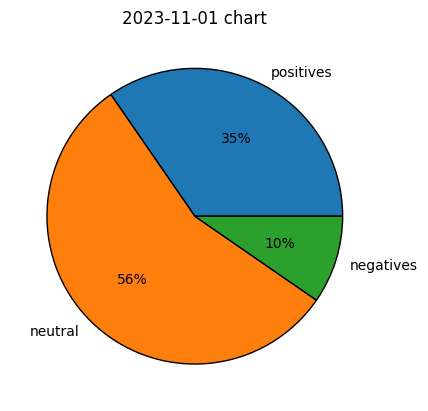

postives=18, neutral=29, negatives=5

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
1024,"Bitcoin is beyond the point of no return, a bull market (green) is inevitable, IMO. The only questions are: when does FOMO start, how high will this bull go, and how long will it last?",4700.0,210.0,332000,843.0,1698872334,BTC,-1,2023-11-01 20:58:54
1044,"Bitcoin is beyond the point of no return, a bull market (green) is inevitable, IMO. The only questions are: when does FOMO start, how high will this bull go, and how long will it last?",4700.0,210.0,334000,845.0,1698872334,BTC,-1,2023-11-01 20:58:54
866,"If Bitcoin breaks $40,000 I will give $1,000 to one person randomly. Like, retweet and make sure you are following me so I can Dm you if you win. Let’s go",3100.0,621.0,61000,2600.0,1698873788,BTC,1,2023-11-01 21:23:08
872,"$35,000 for 1 #Bitcoin",2200.0,397.0,167000,403.0,1698872625,BTC,0,2023-11-01 21:03:45
1025,SEC Chairman is reviewing up to 12 spot #Bitcoin ETFs for approval.Get the FULL report: https://thebitcoinreport.co/products/the-bitcoin-report?promo=30FREE…,2200.0,76.0,118000,470.0,1698857377,BTC,0,2023-11-01 16:49:37
736,"#Bitcoin October closing price: $34,661 .. halving in 6 months",2000.0,88.0,130000,348.0,1698797101,BTC,0,2023-11-01 00:05:01
1027,"“The #Bitcoin whitepaper is one of the most seminal works of Computer Science in the last 30 years"" - @Jack Dorsey",1800.0,84.0,73000,343.0,1698833208,BTC,0,2023-11-01 10:06:48
868,BITCOIN IS PUMPING HARD,1300.0,116.0,38000,220.0,1698873622,BTC,0,2023-11-01 21:20:22
1023,"#Bitcoin up +$1,000 in one hour (3%)",1300.0,98.0,50000,243.0,1698875196,BTC,0,2023-11-01 21:46:36
874,"The #Bitcoin halving.One of the most anticipated events in crypto, but what does it mean for you?Find out",967.0,219.0,152000,293.0,1698861717,BTC,0,2023-11-01 18:01:57



 Reddit Data 


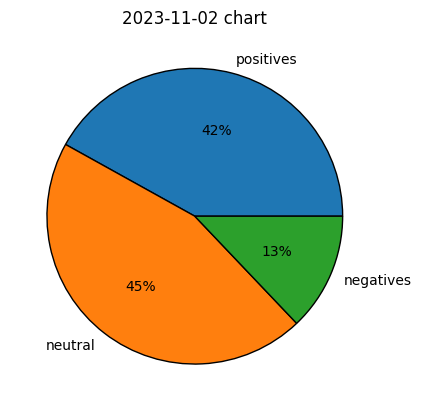

postives=13, neutral=14, negatives=4

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2249,Remember the GameSTop Short? That but Except this time you can't print more bitcoin LOL,1.698885e+09,0.83,34,17,BTC,1,2023-11-02 00:33:13
2244,What price target must be hit for bitcoin mining to be as crazy as it was in covid times?,1.698889e+09,0.73,5,10,BTC,-1,2023-11-02 01:33:50
2250,Question from a newcomer regarding the implications of FED's current economic strategy on Bitcoin.,1.698885e+09,1.00,4,6,BTC,0,2023-11-02 00:32:35
2245,Wallet recommendations for a first timer? Visiting El Salvador soon and I want to try using Bitcoin.,1.698889e+09,1.00,3,9,BTC,0,2023-11-02 01:31:01
2252,steadiness or increase in price is GOOD FOR BITCOIN,1.698884e+09,0.63,2,4,BTC,1,2023-11-02 00:21:21
2240,Bitcoin Supply,1.698894e+09,1.00,2,2,BTC,0,2023-11-02 02:56:57
2122,Guidance on BTC futures trading?,1.698894e+09,1.00,1,1,BTC,0,2023-11-02 02:52:05
2234,Cheapest way to buy BTC,1.698894e+09,1.00,1,1,BTC,0,2023-11-02 02:55:33
2121,🚨FED PAUSES RATE HIKES AS BITCOIN & ALTCOINS LOOK BULLISH! PAYPAL CRYPTO UK,1.698890e+09,1.00,1,0,BTC,0,2023-11-02 01:47:18
2239,Vitalik just gave us the future roadmap for Bitcoin,1.698895e+09,1.00,1,0,BTC,0,2023-11-02 03:11:26



 twitter Data 


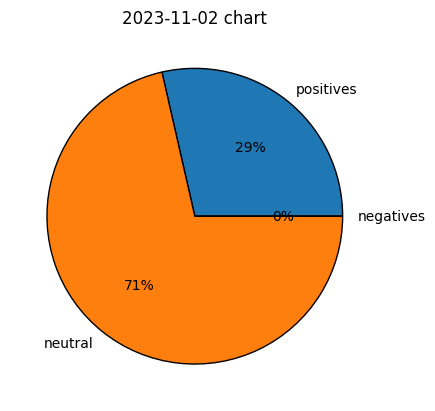

postives=2, neutral=5, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
862,WE NEED $40K BITCOIN !!,239.0,67.0,4600,39.0,1698894374,BTC,0,2023-11-02 03:06:14
851,"Altcoin Daily is averaging 100,000+ views per day everyday on YouTube.#crypto #ethereum #bitcoinI can't wait until the bull market picks up.",61.0,37.0,3500,5.0,1698894618,BTC,0,2023-11-02 03:10:18
900,"$BTC gained roughly 28% in October — its strongest showing since January. Watch CoinDesk Indices Head of Research @Tgroth8 break down the performance of major cryptocurrencies last month, along with highlights from the broader macro environment",44.0,17.0,12000,12.0,1698891420,BTC,1,2023-11-02 02:17:00
1053,"MicroStrategy Announces Third Quarter 2023 Financial Results: 158,400 bitcoin holdings at a total cost of $4.69 billion, or $29,586 per bitcoin, as of October 31, 2023. 6,067 bitcoins acquired since the end of Q2 for $167.0 million, or $27,531 per bitcoin. https://microstrategy.com/en/investor-relations/press/microstrategy-announces-third-quarter-2023-financial-results_11-01-2023…",43.0,7.0,8600,14.0,1698889356,BTC,0,2023-11-02 01:42:36
1045,"Today three Bitcoin whale addresses transferred 6,500 Bitcoins to new addresses, totaling about $230 million. The Bitcoins in these three addresses were all transferred on November 5, 2017, and have been dormant since then. https://oklink.com/btc/address/1yRZCrLmRZGyycjJpVq6cLG9GtDyfWVqE…",40.0,11.0,8000,5.0,1698893131,BTC,0,2023-11-02 02:45:31
952,Cantor analysts are citing revisions to Bitcoin ETF applications as a reason for an eventual approval by the SEC,16.0,9.0,3800,1.0,1698894017,BTC,1,2023-11-02 03:00:17
1046,"The source of Bitcoin originated from the earliest transfer in July 2011. Some Bitcoins came from the wallet address marked as F2Pool by bitinfocharts, which may be early miners.",7.0,3.0,3300,2.0,1698894738,BTC,0,2023-11-02 03:12:18





ETH 
 Reddit Data 


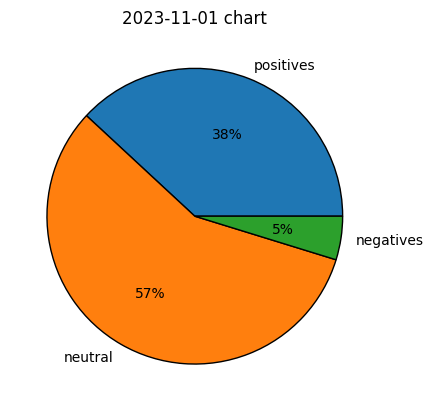

postives=8, neutral=12, negatives=1

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2106,$MEMEFARMS - Where Memes Meet Financial Growth | Stealth Launch Today @ 17:00 UTC | Strong community | LowCAP | ETH-Chain,1.698831e+09,0.92,532,3,ETH,1,2023-11-01 09:26:33
2104,WAGIE - (ETH) 16k MC | Low Cap | Daily VC | Hardworking Team | Connected Dev | Innovative Anti - Dump Protocol & Memes | Come Join Us :),1.698857e+09,0.97,476,5,ETH,1,2023-11-01 16:42:05
2353,Can anyone recommend which DEX for swapping ETH to SOL?,1.698868e+09,1.00,27,26,ETH,1,2023-11-01 19:48:18
2341,Anonymity preserving transactions on Ethereum blockchain?,1.698846e+09,0.96,23,3,ETH,0,2023-11-01 13:32:24
2335,Ethereum Has Over 10x Full-Time Developers Than Cardano: Will ADA Ever Catch Up?,1.698825e+09,0.65,13,56,ETH,0,2023-11-01 07:42:22
2334,"The Ethereum network, now has more than 100 million addresses holding a balance. Signaling growing interest as signs point toward a bull run.",1.698825e+09,0.69,11,45,ETH,1,2023-11-01 07:43:13
2318,"Onyx Suffers Breach As Attacker Swaps ETH For PEPE, 'Precision Loss' Of Over $2M",1.698857e+09,0.73,7,20,ETH,-1,2023-11-01 16:37:19
2302,"5,154 ETH Worth $9M Was Just Burned",1.698878e+09,0.82,7,9,ETH,1,2023-11-01 22:31:32
2307,"Ethereum Resilient Above $1,800 Pre-FOMC Assembly",1.698867e+09,0.87,6,8,ETH,0,2023-11-01 19:24:32
2338,Rhino Review - Ethereum Staking Journal #18 is out!,1.698867e+09,0.84,4,1,ETH,0,2023-11-01 19:29:49



 twitter Data 


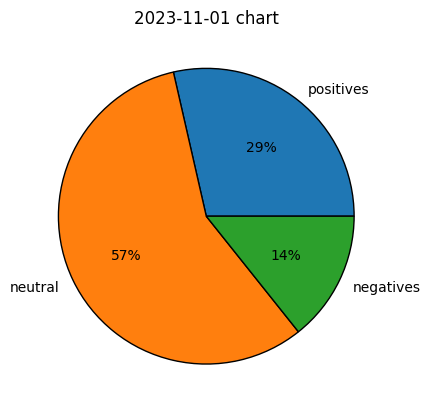

postives=6, neutral=12, negatives=3

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
268,ETH TO $2000 IN NEXT 72HRS Pls god Pls,395.0,117.0,11000,82.0,1698809075,ETH,1,2023-11-01 03:24:35
1087,"49,999,998 #USDT (50,034,998 USD) transferred from unknown wallet to #Krakenhttps://whale-alert.io/transaction/ethereum/0xe1be743750de42fc702feec944e7679051e2527482ff43269c78d5932b3712ee…",379.0,39.0,56000,46.0,1698840498,ETH,0,2023-11-01 12:08:18
1034,"Polygon CDK: Your Guide to Sovereign L2 Scaling, From A to ZK------Polygon CDK (Chain Development Kit) makes it easy for developers to design and launch zero-knowledge (ZK) L2s on Ethereum, on demand. In the future, Polygon CDK-deployed chains can be interoperable and unified…",312.0,18.0,42000,78.0,1698863498,ETH,1,2023-11-01 18:31:38
1001,Drop your $ETH wallets and I'll send $8500Just RT & Follow me,208.0,206.0,10000,194.0,1698828561,ETH,-1,2023-11-01 08:49:21
1090,"100,000,000 #CRO (6,127,036 USD) transferred from unknown wallet to #CryptoComhttps://whale-alert.io/transaction/ethereum/0x5d4efc2b3b0d4718719fa1538f75bdb86ee204b9200f86f389784aff05828a3d…",193.0,33.0,54000,33.0,1698835623,ETH,0,2023-11-01 10:47:03
1089,"15,000 #ETH (27,067,854 USD) transferred from unknown wallet to #GateIOhttps://whale-alert.io/transaction/ethereum/0xb5ee8f8dc8f20a7d298d9b4d9fcedabd0cc52e385eb43830e74e9456acda6c5f…",192.0,22.0,46000,20.0,1698836013,ETH,0,2023-11-01 10:53:33
1088,"100,000,000 #CRO (6,100,253 USD) transferred from unknown wallet to #CryptoComhttps://whale-alert.io/transaction/ethereum/0x540e15048b45253a2114d7710c9edaace9699b7d3f2166ed456d88b96e28c54f…",167.0,26.0,48000,22.0,1698839409,ETH,0,2023-11-01 11:50:09
997,"$10,000 in $ETH RT & follow ""done"" ( 10 winners!)",162.0,162.0,6300,160.0,1698855223,ETH,0,2023-11-01 16:13:43
1086,"100,000,000 #CRO (6,109,556 USD) transferred from unknown wallet to #CryptoComhttps://whale-alert.io/transaction/ethereum/0x7fc539faac148ffd9c4775fcc457f3759f1d3e54beccaaf4fd1de1074d7f6965…",160.0,21.0,46000,20.0,1698848834,ETH,0,2023-11-01 14:27:14
1081,"4,464,530,677,374 #SHIB (33,914,658 USD) transferred from #Bitvavo to unknown wallethttps://whale-alert.io/transaction/ethereum/0xbd1efa988575893ce1f7745fff83ce2893c5e620ec0e6c8729a6f472a8d9d36d…",159.0,26.0,40000,29.0,1698855958,ETH,0,2023-11-01 16:25:58



the dataframe is empty in this day: 2023-11-02

 twitter Data 


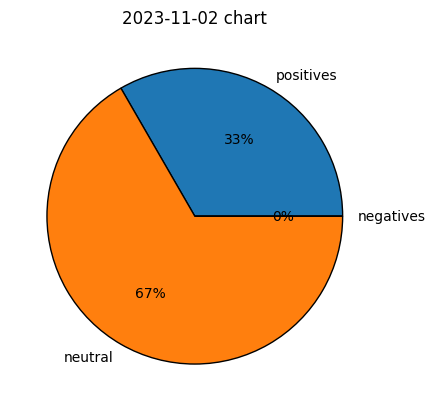

postives=1, neutral=2, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
1067,"20,000,000 #MATIC (13,319,185 USD) transferred from unknown wallet to #Coinbasehttps://whale-alert.io/transaction/ethereum/0x93211407496f8369b7e820da4f787feae4d0614907e88e07d30a33949bdf382a…",112.0,24.0,29000,14.0,1698885403,ETH,0,2023-11-02 00:36:43
1066,"100,000,000 #CRO (6,249,146 USD) transferred from unknown wallet to #CryptoComhttps://whale-alert.io/transaction/ethereum/0x8f0f69247e0214d5276ec125b7fcd50435776e3b9a9495bd3458730cd85e2e93…",75.0,25.0,25000,12.0,1698889834,ETH,0,2023-11-02 01:50:34
956,"Ethereum co-founder Joseph Lubin robbed his earliest employees of the value of stock awards that drew them to his blockchain firm, ex-workers allege",37.0,11.0,7800,14.0,1698883220,ETH,1,2023-11-02 00:00:20





ETC 
the dataframe is empty in this day: 2023-11-01

 twitter Data 


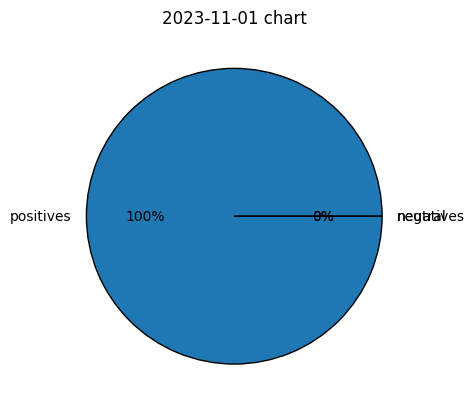

postives=2, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
1062,"According to TokenUnlocks, large-amount unlocks (more than 10 million US dollars) in November include SUI IMX HFT APT APE AVAX OP, etc., with an unlock value of over 396 million US dollars.https://token.unlocks.app",113.0,13.0,35000,27.0,1698846857,ETC,1,2023-11-01 13:54:17
1012,$burger also starting But $mbl will follow $snt $polyx $qkc $lsk etc i told enough times hope u guys bought the dips and will remember this time,51.0,12.0,3700,15.0,1698833384,ETC,1,2023-11-01 10:09:44



the dataframe is empty in this day: 2023-11-02

the dataframe is empty in this day: 2023-11-02



Avalanche(AVAX) 
 Reddit Data 


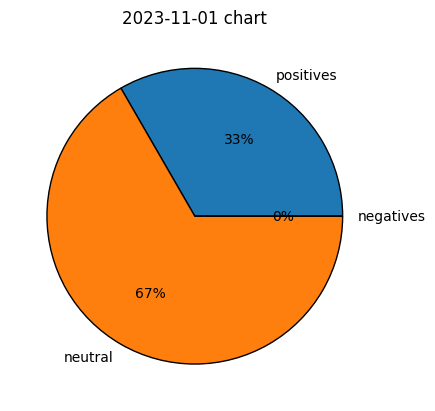

postives=2, neutral=4, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2358,One cannot swap on an Avax Dex chain for sol?,1.698856e+09,0.89,7,13,Avalanche(AVAX),0,2023-11-01 16:29:29
2371,Astra Upgrade: Revolutionizing Avalanche Subnets for Enhanced Decentralized Operations,1.698853e+09,1.00,6,1,Avalanche(AVAX),0,2023-11-01 15:32:50
2367,Need some urgent help! All my staked AVAX via core.app has disappeared!,1.698877e+09,1.00,4,4,Avalanche(AVAX),1,2023-11-01 22:14:35
2114,Ava Labs Proposes Astra Upgrade to Enhance Avalanche Subnets,1.698856e+09,0.81,3,4,Avalanche(AVAX),0,2023-11-01 16:27:01
2366,How much do you care about technical details of Avalanche?,1.698880e+09,1.00,3,3,Avalanche(AVAX),1,2023-11-01 23:10:23
1947,IBC is coming to Avalanche: Meet Landslide 🚀,1.698812e+09,1.00,1,1,Avalanche(AVAX),0,2023-11-01 04:07:00



the dataframe is empty in this day: 2023-11-01

the dataframe is empty in this day: 2023-11-02

the dataframe is empty in this day: 2023-11-02



Solana(SOL) 
 Reddit Data 


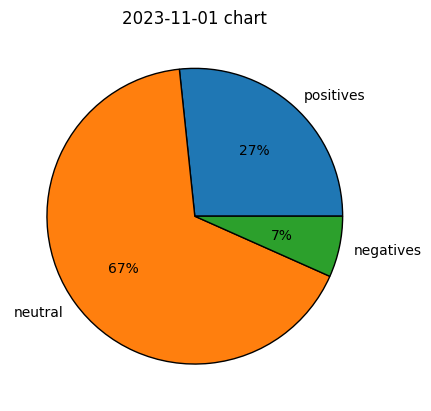

postives=4, neutral=10, negatives=1

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2354,"You might know me as the guy with 5 SOL from the last post. Now I am the guy with 6 SOL. We will all gonna make it, SOLBROS.",1.698868e+09,0.93,61,36,Solana(SOL),0,2023-11-01 19:38:22
2360,Solana Integrates with Amazon Web Services to Boost Blockchain Accessibility,1.698855e+09,0.97,28,6,Solana(SOL),1,2023-11-01 16:12:32
2346,Just here to say that it feels good to finally see the Cardano and Matic shills go quiet. Solana FTW!,1.698883e+09,0.93,13,4,Solana(SOL),1,2023-11-01 23:54:55
2364,How To Stake SOL with Cold Wallet Ledger,1.698833e+09,0.92,10,6,Solana(SOL),0,2023-11-01 10:03:11
2356,Is there any impact to performance while using Light Protocol for private SOL transactions?,1.698859e+09,1.00,8,4,Solana(SOL),0,2023-11-01 17:18:42
2348,Solana BreakPoint 2023 - Day 2 - it was stunning! 📢,1.698880e+09,1.00,8,2,Solana(SOL),1,2023-11-01 23:01:32
2347,Looking for a trustworthy validator to stake solana on my ledger any help?,1.698880e+09,1.00,7,6,Solana(SOL),1,2023-11-01 23:08:03
2362,Solana Breakpoint 2023 Livestream | Day 2,1.698839e+09,1.00,6,3,Solana(SOL),0,2023-11-01 11:38:54
2351,Solana missing after withdrawing staked Solana,1.698869e+09,0.75,4,2,Solana(SOL),-1,2023-11-01 20:08:20
1932,"Solana Integrates with Google Cloud's BigQuery, Enhancing Blockchain Analytics",1.698820e+09,1.00,3,1,Solana(SOL),0,2023-11-01 06:20:12



 twitter Data 


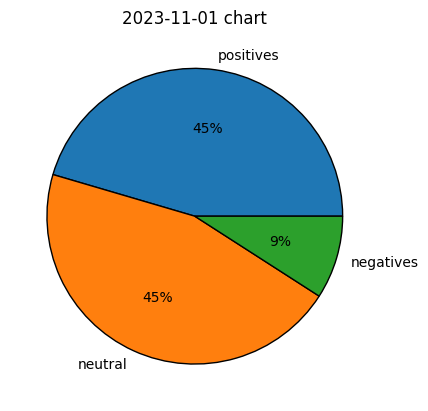

postives=5, neutral=5, negatives=1

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
1042,"It has been great visiting SOL's Breakpoint conference this weekExciting to learn about all of the new developments, especially Firedancer!I have high hopes that it will be able to achieve massive scalabilityAs it is breaking new ground in terms of single-shard performance",737.0,77.0,102000,97.0,1698849877,Solana(SOL),1,2023-11-01 14:44:37
1043,gm from @SolanaConf #Breakpoint2023 Amsterdam! Tune into the Day 2 livestream,636.0,45.0,65000,107.0,1698843678,Solana(SOL),0,2023-11-01 13:01:18
714,"What a whirlwind Day 1 at #Breakpoint2023!The vibes were on point and the Solana community showed up as strong as ever.This is just the start. Livestream of @SolanaConf Day 2 starts at 9:00am UTC tomorrow morning on X, YouTube, and at http://solana.com/breakpoint!",414.0,25.0,24000,82.0,1698799202,Solana(SOL),1,2023-11-01 00:40:02
1077,"256,652 #SOL (11,317,975 USD) transferred from unknown wallet to #Binancehttps://whale-alert.io/transaction/solana/VoxfbhvQYXXQyR9bQ2N9sE1MBgqLbcdTNr2nwiGCSBQKHdSmnVwbq9VPMDKckUR4UwxdfeXfczXfLjC7JFsmnpH…",367.0,51.0,82000,45.0,1698862406,Solana(SOL),0,2023-11-01 18:13:26
1040,Day 2 at Solana #Breakpoint2023 kept the vibes going strong! @Neodyme Security Day kickoff with @aeyakovenkoBoba Guys: 800% ROI on loyalty program built on Solana@Swissborg adds Solana integration via @orca_soRead more: https://solana.com/news/breakpoint-2023-day-2-swissborg-security-day-boba-guys…See you tomorrow!,342.0,21.0,24000,62.0,1698881580,Solana(SOL),1,2023-11-01 23:33:00
1072,"249,999 #SOL (10,799,103 USD) transferred from unknown wallet to #Binancehttps://whale-alert.io/transaction/solana/4zvy9nJBNywCCstdocLS3Fm3BRwtbD2zY9e4MgQybLAStdnaymhDoQHz3gZAJYki1RGhz9uJQiacPLuPzw4ioxfF…",248.0,69.0,58000,39.0,1698876802,Solana(SOL),0,2023-11-01 22:13:22
1059,"FTX Cold Storage #2 redeemed 1,600,645 SOL ($65.46M) from the staking again. There are still 3,963,725 SOL ($162M) staked at this address. FTX/Alameda address has transferred 1,259,886 SOL ($40.67M) to CEX since 10/25. SOL rose 13% in 24h to nearly $41, a new high in a year.…",190.0,22.0,69000,76.0,1698854768,Solana(SOL),1,2023-11-01 16:06:08
1084,"1,600,645 #SOL (66,145,035 USD) transferred from unknown wallet to unknown wallethttps://whale-alert.io/transaction/solana/4HiwLY12VTjySCdD4sZ9P3W4wq8jLX76Ld4JoduUtUPnD44hifVjPy6Gw4A1Lwo5LZrazY4TL4ttNCm4oaG7AkaY…",160.0,22.0,49000,16.0,1698852012,Solana(SOL),0,2023-11-01 15:20:12
951,"Solana’s $SOL outperformed other top crypto assets in October with a 50% gain, adding $6 billion to its market cap.SOL is also up over 250% year-to-date. https://coindesk.com/markets/2023/10/31/first-mover-americas-solanas-sol-gains-50-in-october/?utm_campaign=CoinDesk&utm_source=twitter&utm_medium=social&utm_content=Charts%2CNewsletter%2Ceditorial&term=organic…",149.0,26.0,32000,30.0,1698850474,Solana(SOL),1,2023-11-01 14:54:34
856,#Solana PUMP then DUMP!?Is Solana crypto is about to CRASH??(send this to a #SOL holder)!Here (click) >> https://youtu.be/3PuDRH6PC4w,95.0,63.0,28000,12.0,1698881478,Solana(SOL),0,2023-11-01 23:31:18



 Reddit Data 


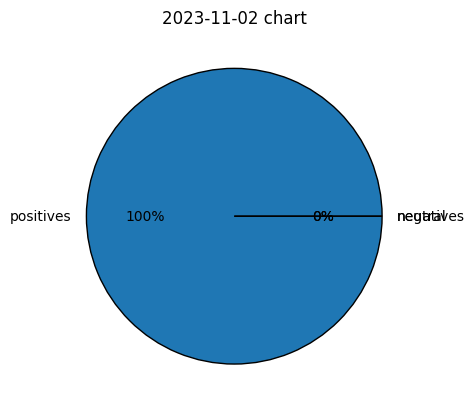

postives=1, neutral=0, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2344,How To Easily Bridge to Solana (without using a CEX): Step-by-Step Guide,1.698885e+09,1.0,5,1,Solana(SOL),1,2023-11-02 00:36:57



 twitter Data 


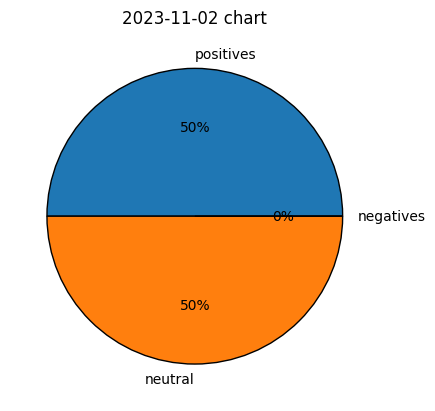

postives=1, neutral=1, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
1047,"Spot On Chain shows that FTX and Alameda addresses transferred 9 assets worth US$46 million to Kraken, Binance and Coinbase again, including 500k SOL ($21.6m), 14m MATIC ($9.3m), 2784ETH ($5.15m), 810k MASK, 2.1 million SUSHI, 7.67 million BAT, 71.6 million GALA, 650k LDO, 4.47…",39.0,7.0,18000,15.0,1698892189,Solana(SOL),1,2023-11-02 02:29:49
906,"A year after Sam Bankman-Fried was undone by @IanAllison123's scoop, $SOL and other FTX holdings are flying high.Ian Allison and @inkbacker report",38.0,7.0,16000,9.0,1698883685,Solana(SOL),0,2023-11-02 00:08:05





Monero(XMR) 
the dataframe is empty in this day: 2023-11-01

the dataframe is empty in this day: 2023-11-01

the dataframe is empty in this day: 2023-11-02

the dataframe is empty in this day: 2023-11-02



Optimism(OP) 
 Reddit Data 


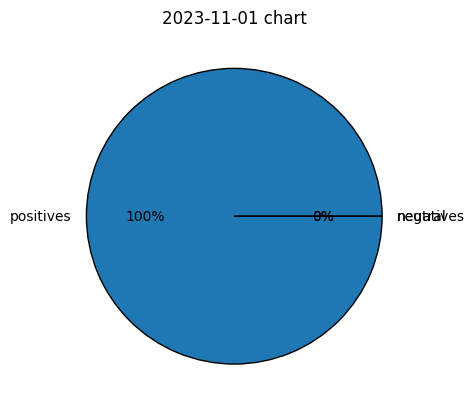

postives=1, neutral=0, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2163,"Having trouble sending Optimism, help!",1.698836e+09,0.5,0,7,Optimism(OP),1,2023-11-01 10:49:03



 twitter Data 


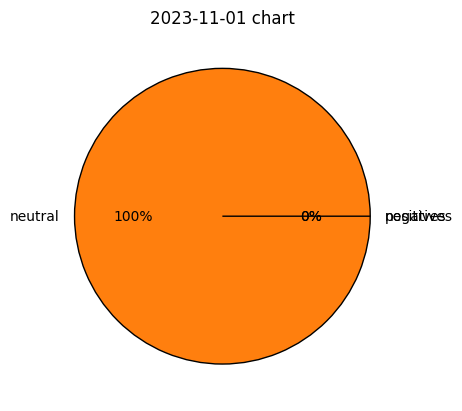

postives=0, neutral=2, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
1028,Don't miss top gainers in the #Optimism Ecosystem over past 7 days! $OOKI @OokiTrade $MMY @mummyftm $CTX @CryptexFinance$UNIDX @UniDexFinance$COLLAB @Collab_Land_$ANGLE @AngleProtocol$LYRA @lyrafinance$BEETS @beethoven_x$HND @HundredFinance$KROM…,13.0,1.0,345,5.0,1698852725,Optimism(OP),0,2023-11-01 15:32:05
700,Let's explore hottest pairs on #Optimism last 24 hours! $WLD @worldcoin $FIRE @promethios_fire $VELO @VelodromeFi$STG @StargateFinance$SONNE @SonneFinance#Layer2 $OP @optimismFND,1.0,NaN,49,NaN,1698813789,Optimism(OP),0,2023-11-01 04:43:09



the dataframe is empty in this day: 2023-11-02

the dataframe is empty in this day: 2023-11-02



PAX Gold(PAXG) 
the dataframe is empty in this day: 2023-11-01

the dataframe is empty in this day: 2023-11-01

the dataframe is empty in this day: 2023-11-02

the dataframe is empty in this day: 2023-11-02



Ripple(XRP) 
 Reddit Data 


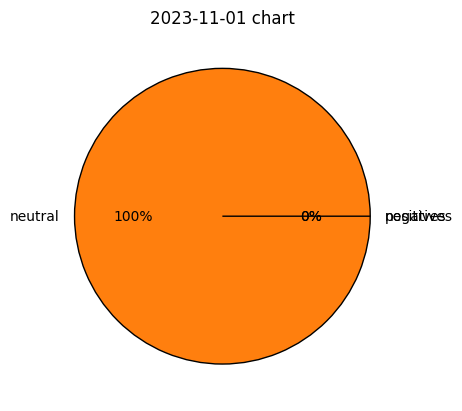

postives=0, neutral=2, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2379,Lock XRP to Mint XAH: XRP-Friendly Exchange Launches New Features For XRP Holders,1.698847e+09,1.0,3,0,Ripple(XRP),0,2023-11-01 13:48:56
2136,Coinbase is holding my XRP for ransom in vault.,1.698859e+09,0.5,0,28,Ripple(XRP),0,2023-11-01 17:20:32



 twitter Data 


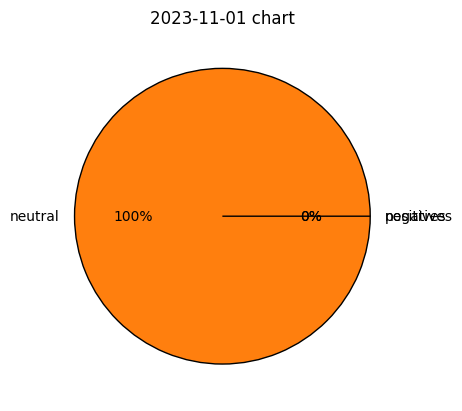

postives=0, neutral=9, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
1003,"The first major triangle on the #XRP chart gave investors a 95,000% return. As the second big triangle comes to an end I am fully invested in XRP. What is your price prediction?",443.0,74.0,52000,70.0,1698844128,Ripple(XRP),0,2023-11-01 13:08:48
1080,"400,000,000 #XRP (238,370,064 USD) locked in escrow at #Ripplehttps://whale-alert.io/transaction/ripple/D5DFE43217E615EE11E0706E66D29A17E28622A926B9934F07ECC9D0447E74DA…",325.0,28.0,76000,53.0,1698855981,Ripple(XRP),0,2023-11-01 16:26:21
1092,"412,890,441 #XRP (248,922,341 USD) transferred from unknown wallet to unknown new wallethttps://whale-alert.io/transaction/ripple/F9C1937F2E06BB041CA4A890AC223631406A905D30DE23EC37ACF0B2342475FC…",305.0,40.0,81000,54.0,1698833061,Ripple(XRP),0,2023-11-01 10:04:21
791,"500,000,000 #XRP (299,906,071 USD) unlocked from escrow at #Ripplehttps://whale-alert.io/transaction/ripple/B6EE1997F13967CE24DA6724D5131271B7D3A267A0A5B55B93B77DE384F4DAE8…",288.0,53.0,78000,61.0,1698796810,Ripple(XRP),0,2023-11-01 00:00:10
1079,"400,000,000 #XRP (238,491,794 USD) locked in escrow at #Ripplehttps://whale-alert.io/transaction/ripple/91D307445E33E596689D763F10E4188A9900764E3870B7FB3180A38044B8F8EB…",255.0,21.0,61000,44.0,1698856035,Ripple(XRP),0,2023-11-01 16:27:15
792,"400,000,000 #XRP (239,924,857 USD) unlocked from escrow at #Ripplehttps://whale-alert.io/transaction/ripple/67B581E62ACD65EEEF0B2A4BB640AB4B00210A2E8934532277959075E311E0F2…",208.0,23.0,46000,46.0,1698796810,Ripple(XRP),0,2023-11-01 00:00:10
1075,"18,700,000 #XRP (11,475,034 USD) transferred from unknown wallet to #Bitsohttps://whale-alert.io/transaction/ripple/945A564F9008A05F189CCECF7FE08E50E1660ADFA5872C11DA0542272BA84B32…",158.0,18.0,42000,29.0,1698872181,Ripple(XRP),0,2023-11-01 20:56:21
793,"100,000,000 #XRP (59,981,214 USD) unlocked from escrow at #Ripplehttps://whale-alert.io/transaction/ripple/4653E68A90E95383AB29BBC9225331EE9ACC64626561CB23E065C93C0FA351DE…",151.0,14.0,35000,34.0,1698796809,Ripple(XRP),0,2023-11-01 00:00:09
639,On the left is me when I bought #XRP years ago. On the right is me now!,101.0,15.0,5900,5.0,1698798475,Ripple(XRP),0,2023-11-01 00:27:55



the dataframe is empty in this day: 2023-11-02

 twitter Data 


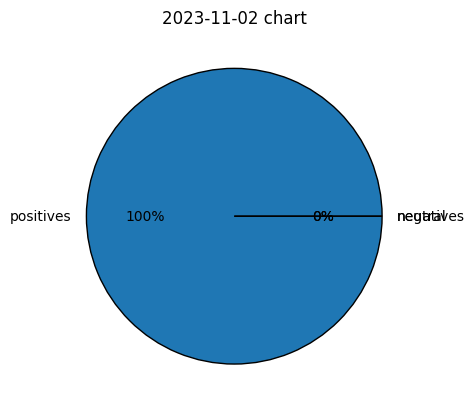

postives=1, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
1002,Who in the #XRP community promoted #safemoon?,21.0,12.0,4800,1.0,1698888646,Ripple(XRP),1,2023-11-02 01:30:46





Arbitrum(ARB) 
the dataframe is empty in this day: 2023-11-01

 twitter Data 


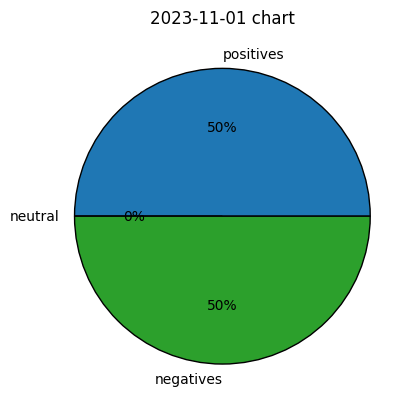

postives=1, neutral=0, negatives=1

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
859,"If you are not a student but interested in representing Arbitrum, stay tuned for the launch of the Community & Tech Fleet in phase 2 of the Ambassador program!Visit the Ambassador page below for more details and to stay informed.",25.0,2.0,7600,5.0,1698857125,Arbitrum(ARB),-1,2023-11-01 16:45:25
860,"If you would like to reach out to the Foundation regarding your eligibility for current and future phases, please email partnerships@arbitrum.foundation",19.0,1.0,7100,1.0,1698857126,Arbitrum(ARB),1,2023-11-01 16:45:26



the dataframe is empty in this day: 2023-11-02

 twitter Data 


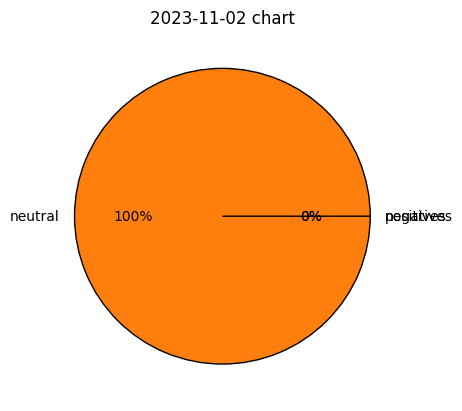

postives=0, neutral=1, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
858,Are you a contributor to the Arbitrum ecosystem?Apply to the Arbitrum Citizens Retrofunding now with @ArbitrumGrants and @gitcoin!,110.0,13.0,21000,24.0,1698884048,Arbitrum(ARB),0,2023-11-02 00:14:08





Binance(BNB) 
the dataframe is empty in this day: 2023-11-01

the dataframe is empty in this day: 2023-11-01

the dataframe is empty in this day: 2023-11-02

the dataframe is empty in this day: 2023-11-02



Cardano(ADA) 
 Reddit Data 


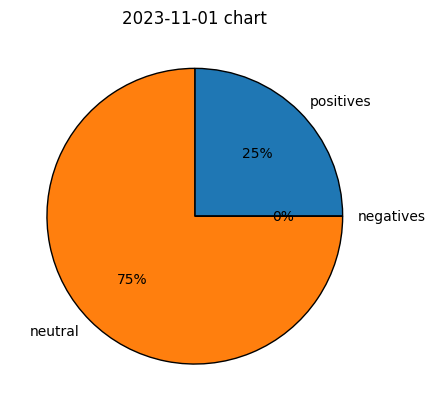

postives=2, neutral=6, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2560,Tangem To Unveil Tangem Ring Hardware Wallet at Cardano Summit 2023,1.698852e+09,0.98,49,11,Cardano(ADA),0,2023-11-01 15:17:55
2559,Cardano AGIX Purchase,1.698857e+09,0.96,17,10,Cardano(ADA),0,2023-11-01 16:48:53
2558,Cardano Summit 2023 Live Reporting on Cardano Spot,1.698858e+09,1.00,9,1,Cardano(ADA),0,2023-11-01 16:52:38
2554,"Cardano Updates - Nami Wallet New Owner, Stable coins, TVL + More!",1.698873e+09,1.00,6,1,Cardano(ADA),1,2023-11-01 21:07:00
2556,Introducing Cardano's BlockTree! Join us as we reveal how this blockchain solution is being used to grow forests and generate revenue for local people.,1.698865e+09,1.00,5,1,Cardano(ADA),1,2023-11-01 18:53:51
2561,Understanding the Cardano Mem-Pool (article),1.698848e+09,0.84,4,1,Cardano(ADA),0,2023-11-01 14:14:36
2089,Delegate ADA & keep em in HW wallet,1.698803e+09,0.71,3,4,Cardano(ADA),0,2023-11-01 01:48:38
2137,Unstaking ada,1.698858e+09,0.75,2,5,Cardano(ADA),0,2023-11-01 17:05:21



 twitter Data 


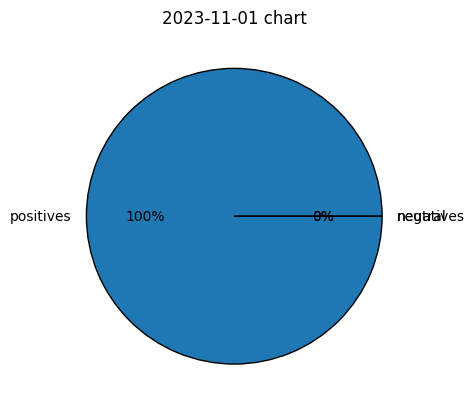

postives=2, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
881,On our way to Dubai for the #CardanoSummit2023 and we are super excited to (re)connect with the Cardano family.See you there @hoskytoken!,80.0,5.0,13000,15.0,1698844125,Cardano(ADA),1,2023-11-01 13:08:45
882,Adaverse is excited to meet amazing minds at the iconic #Cardano Summit in Dubai where we celebrate the wins of innovation and community building#CardanoSummit2023 #Dubai #Web3 #CardanoADA,46.0,1.0,24000,7.0,1698840266,Cardano(ADA),1,2023-11-01 12:04:26



the dataframe is empty in this day: 2023-11-02

the dataframe is empty in this day: 2023-11-02



Cosmos(ATOM) 
 Reddit Data 


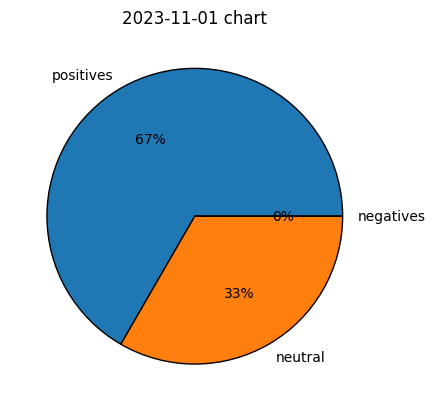

postives=2, neutral=1, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2544,Why no significant price movement on atom with such great staking rewards?,1.698866e+09,0.67,6,40,Cosmos(ATOM),1,2023-11-01 19:13:46
2545,$ATOM staked tokens allocation in one chart,1.698860e+09,0.73,5,5,Cosmos(ATOM),0,2023-11-01 17:31:47
2211,"Our popular on-chain Staking campaign is back! This time, featuring $ATOM and $EGLD 🔥 ✅ Get up to an extra 3% p.a. on your $ATOM and $EGLD stake 📆 Now - Nov 15",1.698860e+09,0.80,3,0,Cosmos(ATOM),1,2023-11-01 17:38:22



the dataframe is empty in this day: 2023-11-01

 Reddit Data 


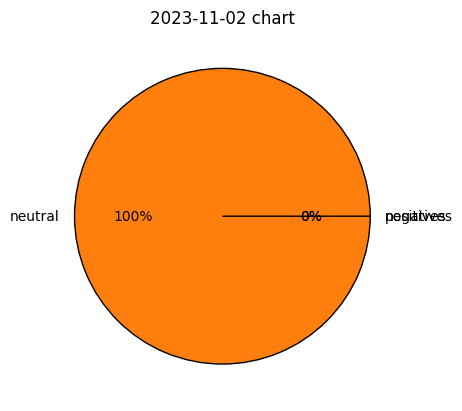

postives=0, neutral=1, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2540,nBTC/atom pool?!,1.698891e+09,1.0,3,0,Cosmos(ATOM),0,2023-11-02 02:06:32



the dataframe is empty in this day: 2023-11-02



Litecoin(LTC) 
 Reddit Data 


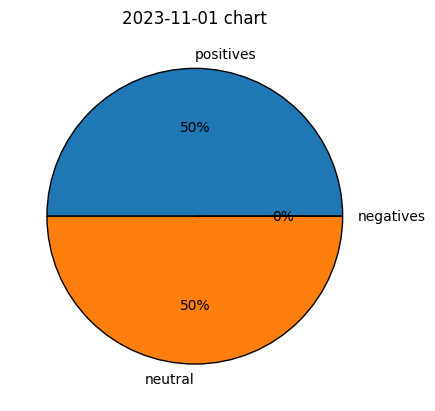

postives=1, neutral=1, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2564,LTC and DOGE are reshaping cryptocurrencies,1.698848e+09,0.92,20,1,Litecoin(LTC),0,2023-11-01 14:12:10
2096,Decoding Litecoin's Future: Litecoin’s Roadmap to Resilience and Adoption Rates for Long-Term Success,1.698807e+09,0.84,8,0,Litecoin(LTC),1,2023-11-01 02:43:45



 twitter Data 


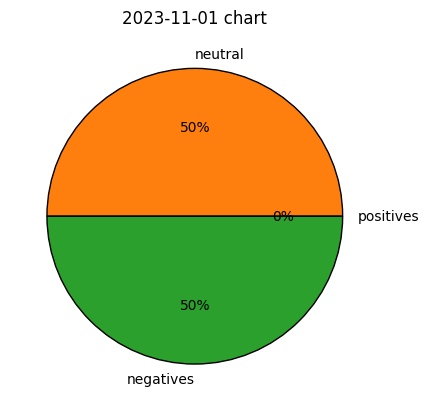

postives=0, neutral=1, negatives=1

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
1020,'Litecoin (LTC) Network Sets Big Milestone' - @Utoday_en,251.0,9.0,12000,65.0,1698857010,Litecoin(LTC),0,2023-11-01 16:43:30
1021,The Ultimate Litecoin Silver Collectable! 50 grams of .999 Silver on a block card with6.25 $LTC mined straight from @ltcpoolLimited Edition Signature cards #6-#10 are listed Available now: https://greatcollections.com/litecoin,160.0,9.0,18000,47.0,1698854545,Litecoin(LTC),-1,2023-11-01 16:02:25



the dataframe is empty in this day: 2023-11-02

the dataframe is empty in this day: 2023-11-02



Chainlink(LINK) 
the dataframe is empty in this day: 2023-11-01

 twitter Data 


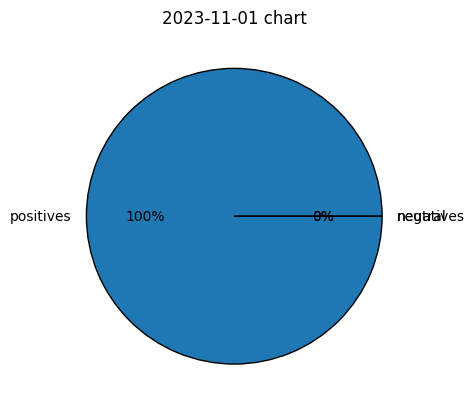

postives=1, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
316,"What happens when a rogue AI meets smart contracts?At #SmartCon 2023, @ChainlinkLabs Chief Scientist @AriJuels explored the impact of AI on blockchains, smart contracts, and oracles using the analogy of a ""wallet-carrying Godzilla."" Watch now",203.0,24.0,11000,35.0,1698804420,Chainlink(LINK),1,2023-11-01 02:07:00



the dataframe is empty in this day: 2023-11-02

the dataframe is empty in this day: 2023-11-02



Aave(AAVE) 
 Reddit Data 


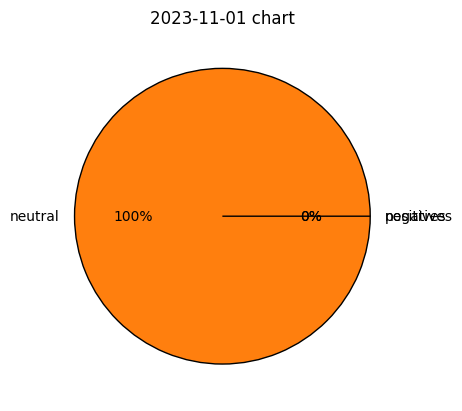

postives=0, neutral=1, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2233,Should I use AAVE to borrow against WBTCZ for monthly expenses?,1.698827e+09,0.75,4,14,Aave(AAVE),0,2023-11-01 08:23:52



 twitter Data 


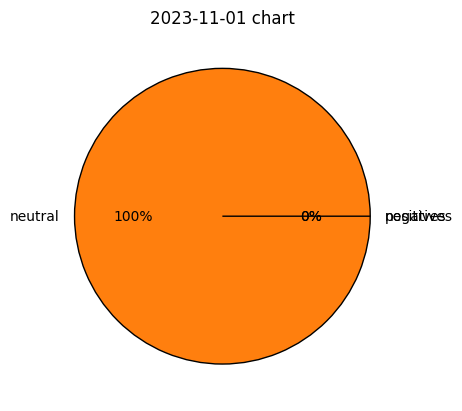

postives=0, neutral=1, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
741,"According to Spot On Chain, addresses related to FTX and Alameda transferred $13.6m to Binance and Coinbase today, including $2.64m DYDX, $1.05m AXS, $520k AAVE, $4.85m GRT, $2.3m RNDR and $967k MKR. To date, FTX and Alameda Research have deposited 26 EVM tokens with $83.6…",24.0,9.0,8800,10.0,1698808673,Aave(AAVE),0,2023-11-01 03:17:53



the dataframe is empty in this day: 2023-11-02

the dataframe is empty in this day: 2023-11-02



Polygon(MATIC) 
 Reddit Data 


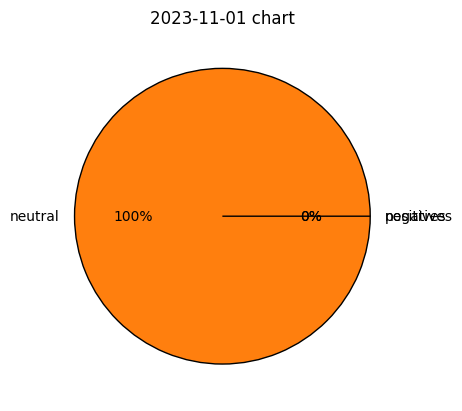

postives=0, neutral=3, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
1807,Anyone had issues depositing from USDC Polygon?,1.698804e+09,0.67,1,7,Polygon(MATIC),0,2023-11-01 02:00:00
2078,Daily Polygon Discussion Thread,1.698817e+09,1.00,1,0,Polygon(MATIC),0,2023-11-01 05:30:10
2159,"Why does Polygon in Ledger say ""To add tokens, simply send them to your Polygon address.""?",1.698858e+09,0.50,0,19,Polygon(MATIC),0,2023-11-01 16:54:44



 twitter Data 


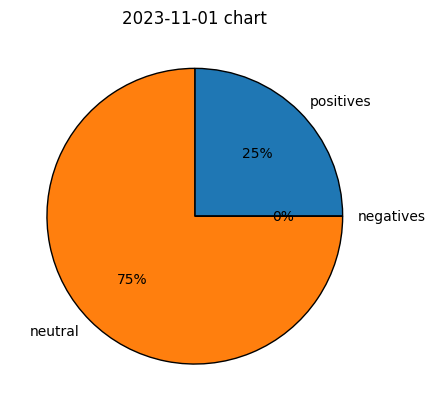

postives=1, neutral=3, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
1037,Polygon Community Town Hall: November 2023,219.0,10.0,26000,57.0,1698847571,Polygon(MATIC),0,2023-11-01 14:06:11
1035,We're on live with @0xPolygonDevs,156.0,4.0,30000,35.0,1698855035,Polygon(MATIC),0,2023-11-01 16:10:35
886,What is your $MATIC price prediction for next month?,57.0,52.0,4400,4.0,1698850965,Polygon(MATIC),0,2023-11-01 15:02:45
1038,"To participate, join the Polygon Discordhttps://discord.gg/6M6dnENQ?event=1168597114914357370…",26.0,NaN,11000,10.0,1698847812,Polygon(MATIC),1,2023-11-01 14:10:12



the dataframe is empty in this day: 2023-11-02

 twitter Data 


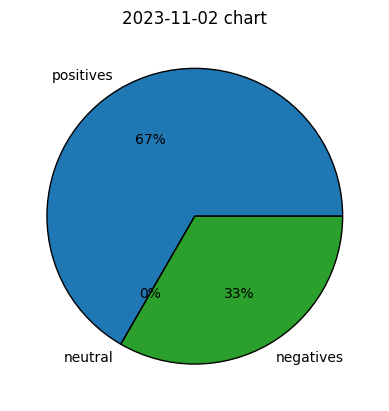

postives=2, neutral=0, negatives=1

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
1032,"We’re in this for the long haul, partnering with founders every step of the way on their journey to create the groundbreaking projects of tomorrow.Polygon Village is (re) launching next week",126.0,11.0,15000,18.0,1698886800,Polygon(MATIC),1,2023-11-02 01:00:00
1030,"The Palm Network has migrated to a CDK chain on @0xPolygon, with the help of @gateway_eth.‣ one step towards becoming a zkL2 chain, building with Polygon CDK‣ another step towards decentralizationMore on the @BuildOnPalm migration:",49.0,5.0,4400,5.0,1698895475,Polygon(MATIC),1,2023-11-02 03:24:35
1031,"1/9 Today we transitioned Palm @BuildOnPalm mainnet into a @0xPoLygonLabs L2. The transition went magically smooth — it took under 1 second, so block production and tooling weren’t affected. Let us open a bit of info about the unique work our mighty team has done. A thread.",6.0,NaN,5000,1.0,1698895476,Polygon(MATIC),-1,2023-11-02 03:24:36


In [17]:
startDateObject=datetime.date(2023,11,1)
endDateObject=datetime.date(2023,11,2)

coinNames =[
"BTC",
"ETH", 
"ETC",
"Avalanche(AVAX)",
"Solana(SOL)",
"Monero(XMR)",
"Optimism(OP)",
"PAX Gold(PAXG)",
"Ripple(XRP)", 
"Arbitrum(ARB)",
"Binance(BNB)",
"Cardano(ADA)",
"Cosmos(ATOM)",
"Litecoin(LTC)",
"Chainlink(LINK)", 
"Aave(AAVE)",
"Polygon(MATIC)",
]

for coinName in coinNames:
    print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+f"\n\n\n{coinName} ",end=Style.RESET_ALL+Back.RESET+Fore.RESET)
    sentiment_anayled_piechart_of_coin(start_dateObj=startDateObject,end_dateObj=endDateObject,coinName=coinName)
    